# [KDT] ch3 가설 검정

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파일 로딩 
df_hk = pd.read_csv('.\\data\hk_221206.csv')
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [8]:
# Data type을 살펴보고 EDA를 수행 
df_hk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         250 non-null    object 
 1   jumin7       250 non-null    object 
 2   gender       250 non-null    object 
 3   height       250 non-null    float64
 4   age          250 non-null    int64  
 5   blood_type   250 non-null    object 
 6   company      250 non-null    object 
 7   grades       250 non-null    object 
 8   salary       250 non-null    int64  
 9   expenditure  250 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 19.7+ KB


## 1 sample t-test

$ H_0 : \mu = \mu_0$

$ H_1 : \mu \neq \mu_0$

In [ ]:
# 1 sample t-test


In [7]:
# t-test를 할 data의 mean
df_hk['age'].mean()

39.24

In [ ]:
# describe


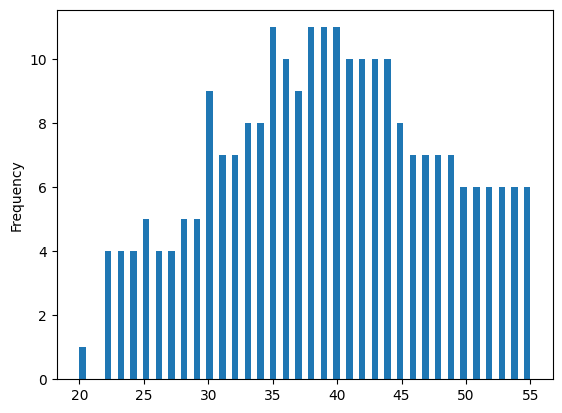

In [16]:
# age의 histogram
df_hk['age'].plot.hist(bins = 71)
plt.show()

In [19]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=30)

TtestResult(statistic=16.882244149646134, pvalue=3.847271424260211e-43, df=249)

In [22]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=38)

TtestResult(statistic=2.265582548220913, pvalue=0.024336341875188777, df=249)

In [27]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=38.5)

TtestResult(statistic=1.3520411981318365, pvalue=0.17758890053555884, df=249)

In [28]:
# t-test를 할 data의 mean 근처의 값으로 t-test후 t통계량과 p_value 관찰
from scipy.stats import ttest_1samp
ttest_1samp(df_hk['age'], popmean=39)

TtestResult(statistic=0.43849984804276027, pvalue=0.6614041860727076, df=249)

### 2 sample t-test


$ H_0 : \mu_0 = \mu_1$

$ H_1 : \mu_0 \neq \mu_1$

In [37]:
# A,B,C회사 연봉 평균
salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

print(salary_a, salary_b, salary_c)

6522.5 5364.4 8013.6


In [36]:
# 2 sample t-test (A=B)
from scipy.stats import ttest_ind

sala = df_hk[df_hk['company'] == 'A'].salary
salb = df_hk[df_hk['company'] == 'B'].salary

ttest_ind(sala, salb)

Ttest_indResult(statistic=5.941362455469809, pvalue=1.2532322871358408e-08)

In [39]:
# 2 sample t-test (A>=B) less
ttest_ind(sala, salb, alternative='less')

Ttest_indResult(statistic=5.941362455469809, pvalue=0.9999999937338386)

In [40]:
# 2 sample t-test (A<=B) greater
ttest_ind(sala, salb, alternative='greater')

Ttest_indResult(statistic=5.941362455469809, pvalue=6.266161435679204e-09)

-----------------------------------------------------------------------

## Quiz 1

1) iris 데이터를 사용하여('iris.csv') species column 'virginica'의 'sepal_width' 모평균이 3.14와 같은지 가설을 수립하고 
   유의수준 0.05에서 검정하시오

2) 'setosa'와 'versicolor'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

In [5]:
# 파일 로딩 
df_iris = pd.read_csv('.\\data\\iris.csv')
df_iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# 가설검정
# H0 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'virginica'의 'sepal_width' 모평균이 3.14 와 같다고 볼 수 없다 (유의수준 0.05)

In [7]:
from scipy.stats import ttest_1samp, ttest_ind

iris_vir = df_iris[df_iris['species'] == 'virginica']

print(ttest_1samp(iris_vir['sepal_width'], 3.14)[1] > 0.05)
print(ttest_1samp(iris_vir['sepal_width'], 3.14)[1] < 0.05)

False
True


In [8]:
# 가설검정
# H0 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 : 'setosa'와 'versicolor' 의 sepal_length 평균이 같다고 볼 수 없다 (유의수준 0.05)

In [9]:
from scipy.stats import ttest_1samp, ttest_ind
iris_set = df_iris[df_iris['species'] == 'setosa']
iris_ver = df_iris[df_iris['species'] == 'versicolor']

print(ttest_ind(iris_set['sepal_length'], iris_ver['sepal_length'])[1] > 0.05)
print(ttest_ind(iris_set['sepal_length'], iris_ver['sepal_length'])[1] < 0.05)

False
True


-----------------------------------------------------------------------

## ANOVA

$ H_0 : \mu_1 = \mu_2 = \mu_3$

$ H_1 : \mu_1 \neq \mu_2  \quad or  \quad  \mu_2 \neq \mu_3  \quad   or  \quad  \mu_1 \neq \mu_3$

In [14]:
# A,B,C회사 연봉 평균이 같은지 검정
salary_a = df_hk[df_hk['company'] == 'A'].salary.mean()
salary_b = df_hk[df_hk['company'] == 'B'].salary.mean()
salary_c = df_hk[df_hk['company'] == 'C'].salary.mean()

print(salary_a, salary_b, salary_c)

6522.5 5364.4 8013.6


In [17]:
# ANOVA scipy.stats 사용
from scipy.stats import f_oneway
a = df_hk[df_hk['company'] == 'A'].salary
b = df_hk[df_hk['company'] == 'B'].salary
c = df_hk[df_hk['company'] == 'C'].salary
f_oneway(a, b, c)

F_onewayResult(statistic=48.004778211948, pvalue=2.4420557389689642e-18)

In [23]:
# ANOVA statsmodels 사용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols(formula = 'salary ~ company', data = df_hk).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
company,2.0,2.384806e+08,1.192403e+08,48.004778,2.442056e-18
Residual,247.0,6.135297e+08,2.483926e+06,NaN,NaN


<AxesSubplot: xlabel='company', ylabel='salary'>

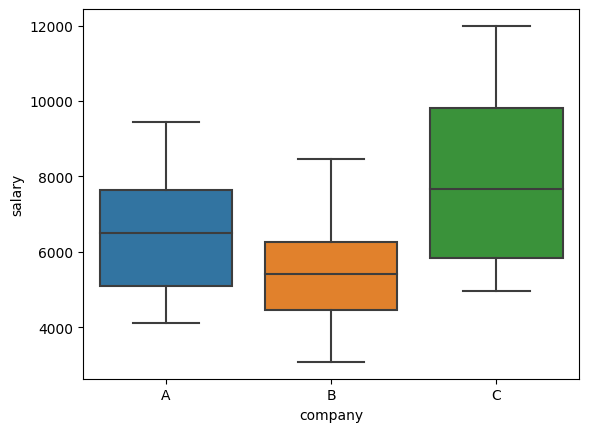

In [24]:
# 시각화 box plot
sns.boxplot(x = 'company', y = 'salary', data = df_hk)

In [30]:
# ANOVA 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd
posthoc = pairwise_tukeyhsd(df_hk['salary'], df_hk['company'], alpha = 0.05)   # y값 먼저   검정치 alpha
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj   lower      upper   reject
--------------------------------------------------------
     A      B  -1158.1   0.0 -1683.6515 -632.5485   True
     A      C   1491.1   0.0   847.4334 2134.7666   True
     B      C   2649.2   0.0  2005.5334 3292.8666   True
--------------------------------------------------------


In [34]:
# grade별 연봉 평균
# ANOVA scipy.stats 사용

a1 = df_hk[df_hk['grades'] == 'A'].salary
b1 = df_hk[df_hk['grades'] == 'B'].salary
c1 = df_hk[df_hk['grades'] == 'C'].salary
d1 = df_hk[df_hk['grades'] == 'D'].salary
f1 = df_hk[df_hk['grades'] == 'F'].salary

print(a1.mean(), b1.mean(), c1.mean(), d1.mean(), f1.mean())
print(f_oneway(a1,b1,c1,d1,f1))

6202.784810126583 6499.396551724138 6442.8125 6354.375 5368.571428571428
F_onewayResult(statistic=0.8236712902602736, pvalue=0.5111463584243112)


In [37]:
# pairwise_tukeyhsd 확인
posthoc1 = pairwise_tukeyhsd(df_hk['salary'], df_hk['grades'], alpha = 0.05)   # y값 먼저   검정치 alpha
print(posthoc1)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     A      B   296.6117 0.8076  -446.0004 1039.2238  False
     A      C   240.0277 0.9721  -826.7163 1306.7717  False
     A      D   151.5902 0.9983 -1244.0566  1547.237  False
     A      F  -834.2134  0.784 -2841.7982 1173.3715  False
     B      C   -56.5841 0.9999 -1073.0998  959.9317  False
     B      D  -145.0216 0.9984 -1502.6635 1212.6203  False
     B      F -1130.8251 0.5191 -3112.1778  850.5276  False
     C      D   -88.4375 0.9999 -1647.1747 1470.2997  False
     C      F -1074.2411 0.6348 -3198.4418 1049.9596  False
     D      F  -985.8036  0.766 -3292.7747 1321.1676  False
-----------------------------------------------------------


In [39]:
# ANOVA statsmodels 사용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols(formula = 'salary ~ grades', data = df_hk).fit()
anova_lm(model1)

,df,sum_sq,mean_sq,F,PR(>F)
grades,4.0,1.130554e+07,2.826385e+06,0.823671,0.511146
Residual,245.0,8.407048e+08,3.431448e+06,NaN,NaN


## Quiz 2

1) 'setosa' , 'versicolor', 'virginica'의 sepal_length 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

3) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 가설검정
# H0 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 같다고 볼 수 있다 (유의수준 0.05)
# H1 :  'setosa' , 'versicolor', 'virginica'의 'sepal_length' 평균이 셋 중 어느 하나는 다르다고 볼 수 있다 (유의수준 0.05)

In [ ]:
# ANOVA scipy.stats 사용


In [ ]:
# ANOVA statsmodels 사용


In [ ]:
# ANOVA 사후검정


## Quiz 3

1) bike 데이터(bike.cvs)를 사용하여, 요일별 registered 평균이 같은지 가설을 수립하고 유의수준 0.05에서 검정하시오

2) 평균이 같지 않을때, 평균이 유의수준 0.05에서 차이나지 않는 조합(False)은 몇 개인가 ? 

In [ ]:
# 파일 로딩 


In [ ]:
# 요일변수 생성


In [ ]:
# ANOVA statsmodels 사용

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [ ]:
# ANOVA 사후검정

from statsmodels.stats.multicomp import pairwise_tukeyhsd


## 상관분석

In [40]:
# 파일 로딩
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [53]:
# Correlation analysis
print(df_hk.corr(method = 'pearson'))
print(df_hk.corr(method = 'spearman'))
print(df_hk.corr(method = 'kendall'))

               height       age    salary  expenditure
height       1.000000  0.040403  0.048673     0.048044
age          0.040403  1.000000  0.525035     0.552832
salary       0.048673  0.525035  1.000000     0.972185
expenditure  0.048044  0.552832  0.972185     1.000000
               height       age    salary  expenditure
height       1.000000  0.039065  0.060429     0.064053
age          0.039065  1.000000  0.616263     0.622084
salary       0.060429  0.616263  1.000000     0.966877
expenditure  0.064053  0.622084  0.966877     1.000000
               height       age    salary  expenditure
height       1.000000  0.026228  0.036980     0.040637
age          0.026228  1.000000  0.487317     0.484665
salary       0.036980  0.487317  1.000000     0.851766
expenditure  0.040637  0.484665  0.851766     1.000000


In [47]:
# pearsonr, spearmanr, kendalltau
from scipy.stats import pearsonr, spearmanr, kendalltau

In [48]:
# pearsonr
pearsonr(df_hk['age'], df_hk['salary'])

PearsonRResult(statistic=0.5250345123258028, pvalue=4.0964819870218215e-19)

In [49]:
# spearmanr
spearmanr(df_hk['age'], df_hk['salary'])

SignificanceResult(statistic=0.616262693087095, pvalue=1.539637811022021e-27)

In [50]:
# kendalltau
kendalltau(df_hk['age'], df_hk['salary'])

SignificanceResult(statistic=0.4873172555182334, pvalue=1.1307798230320081e-29)

<AxesSubplot: xlabel='age', ylabel='salary'>

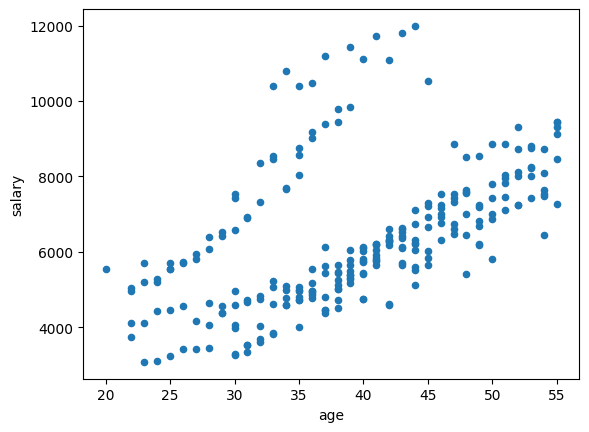

In [54]:
# scatterplot 시각화
df_hk.plot.scatter(x='age', y='salary')

## Quiz 4

bike 데이터(bike.cvs)를 사용하여

1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?

2) season별로 자전거 총 대여 숫자(count)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오 

3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?

In [55]:
# 파일 로딩 
df_bike = pd.read_csv('.\\data\\bike.csv')
df_bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [57]:
# 1) temp, atemp, humidity, registered의 상관 계수중 가장 높은것은 ?
df_bike[['temp', 'atemp', 'humidity', 'registered']].corr()

,temp,atemp,humidity,registered
temp,1.000000,0.984948,-0.064949,0.318571
atemp,0.984948,1.000000,-0.043536,0.314635
humidity,-0.064949,-0.043536,1.000000,-0.265458
registered,0.318571,0.314635,-0.265458,1.000000


In [66]:
# 2) season별로 atemp와 자전거 대여 숫자(casual)와의 상관분석을 실시하고 상관 계수가 가장 높은 계절을 구하시오
from scipy.stats import pearsonr

s1 = df_bike[df_bike['season'] == 1]
s2 = df_bike[df_bike['season'] == 2]
s3 = df_bike[df_bike['season'] == 3]
s4 = df_bike[df_bike['season'] == 4]

print(pearsonr(s1['atemp'], s1['casual']))
print(pearsonr(s2['atemp'], s2['casual']))
print(pearsonr(s3['atemp'], s3['casual']))
print(pearsonr(s4['atemp'], s4['casual']))

PearsonRResult(statistic=0.4783118363669947, pvalue=1.2555620335235248e-153)
PearsonRResult(statistic=0.3781217425355884, pvalue=1.279511013249964e-93)
PearsonRResult(statistic=0.38142310889278164, pvalue=2.3207136234540795e-95)
PearsonRResult(statistic=0.4437509512482175, pvalue=2.7553234038960032e-132)


In [ ]:
# 3) 날씨가 맑은날(weather = 1) 과 그렇지 않은날 온도(temp)와 자전거 대여 숫자(casual)의 상관계수의 절대값은 얼마인가 ?


## 카이스퀘어 검정

$H_0:$ 두 변수는 서로 독립임 (연관이 없음)

$H_1:$ 두 변수는 서로 독립이 아님 (연관이 있음)

In [67]:
# 파일 로딩
df_hk[:5]

,name,jumin7,gender,height,age,blood_type,company,grades,salary,expenditure
0,hkd1,990623-2,F,161.9,22,A,A,A,4100,1975
1,hkd10,900303-2,F,169.4,31,A,A,B,4720,2970
2,hkd100,681205-2,F,168.3,55,A,A,B,7280,5905
3,hkd101,931226-2,F,155.3,28,AB,B,B,4060,2935
4,hkd102,920123-1,M,188.6,29,O,B,F,4390,4015


In [75]:
# chi-squared test 1 / gender <-> company
from scipy.stats import chi2_contingency

cross = pd.crosstab(df_hk['gender'], df_hk['company'])
pd.crosstab(df_hk['gender'], df_hk['company'], normalize = True)
pd.crosstab(df_hk['gender'], df_hk['company'], normalize = 0)
pd.crosstab(df_hk['gender'], df_hk['company'], normalize = 1)

company,A,B,C
gender,,,
F,0.4,0.47,0.5
M,0.6,0.53,0.5


In [76]:
# chi2_contingency
chi2_contingency(cross)

Chi2ContingencyResult(statistic=1.674107142857143, pvalue=0.43298440342651534, dof=2, expected_freq=array([[44.8, 44.8, 22.4],
       [55.2, 55.2, 27.6]]))


In [ ]:
# chi-squared test 2


## Quiz 5

bike 데이터(bike.cvs)를 사용하여

1) season과 weather dtype을 문자형으로 변환하고 

   두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오  

2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
   count_high와 workingday의 독립성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)

In [77]:
# 파일 로딩 
df_bike[:5]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [91]:
# 1) season과 weather dtype을 문자형으로 변환하고
#    두 변수가 관련있는지 적절한 검정을 하고 검정통계량과 p-value를 구하시오
df_bike = pd.read_csv('.\\data\\bike.csv')
t_bike = df_bike[['season', 'weather']].astype('object')
t_bike
crossb = pd.crosstab(t_bike['season'], t_bike['weather'])
chi2_contingency(crossb)

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

In [114]:
# 2) 자전거 총 대여수(count)가 상위 30%일때 'high', 그 미만 일때 'low' 인 파생변수(count_high)를 생성하고
#    count_high와 workingday의 연관성 여부를 검정하고 검정 통계량을 구하시오 (소숫점 넷째자리 반올림하여 표기)
df_bike['count_high'] = np.where(df_bike['count'] >= df_bike['count'].quantile(0.3), 'high', 'low')
crossb1 = pd.crosstab(df_bike['count_high'], df_bike['workingday'])
sta, p, free, exp = chi2_contingency(crossb1)
sta = chi2_contingency(crossb1)[0]
print(round(sta, 3))

1.134


## Quiz 6

<br>교육 전문기관 분석팀에서는 교육 수강자의 정보를 바탕으로 진로설계 프로그램을 운영하기 위해 다음 정보를 수집하였다.
<br>DS_Sample_2.csv (구분자: comma(“,”), 19,158 Rows, 15 Columns, UTF-8 인코딩)

<br>분석을 수행하기 전, 상기 데이터를 이용하여 아래의 전처리를 수행하시오.

<br>단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오.
<br>단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.
<br>단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.
<br>단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.

<br>상기 전처리를 완료한 데이터셋(데이터셋명: job2, 7,522 Rows)을 이용하여 다음 문제에 답하시오.

<br>(job2를 이용하여) ‘관련 분야 경험 여부(relevant_experience)’에 따른 ‘이직 희망 여부(target)’를 기술통계량으로 확인하고자 한다.
<br>관련 분야 경험이 없는(relevant_experience=‘No relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 A,
<br>관련 분야 경험이 있는(relevant_experience=’Has relevant experience’) 수료자 중 이직을 희망(target=’1’)하는 수료자의 비율을 B라 할때, A/B를 구하시오.
-	소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.
<br>(답안예시) 12.34


In [ ]:
# 파일 로딩


In [ ]:
# 단계 1: 분석에 사용하지 않을 city, company_size, company_type 컬럼을 제거하시오


In [ ]:
# 단계 2: 각 문자형(String Type) 컬럼에 결측치(null/empty space)가 하나라도 존재하는 행(row)은 모두 제거하시오.


In [ ]:
# 단계 3: experience 컬럼의 값이 ‘>20’ 또는 ‘<1’인 값을 제거하고 experience 컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# 단계 4: last_new_job 컬럼의 값이 ‘>4’ 또는 ‘never’인 값을 제거하고 last_new_job컬럼의 타입을 정수형(Integer)으로 변환하시오.


In [ ]:
# No relevant experience 중 target = 1 을 A,
# Has relevant experience 중 target = 1 을 B라 할때, A/B를 구하시오
